In [1]:
import os
import tensorflow as tf
import cv2
import csv
import shutil
import random
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
from sklearn.model_selection import train_test_split

In [2]:
height = 224
width = 224
imgs = []
blank_image = np.zeros((height,width), np.uint8)

In [3]:
#iris_dataset_preview
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#clearing images
def clear_images(image):
    imgs.clear()
    if (os.path.exists('data')):
        shutil.rmtree('data')
    os.mkdir('data')
    os.mkdir('data/train')
    os.mkdir('data/test')
    os.mkdir('data/val')
clear_images(imgs) 

In [5]:
#create single SuperTML image from data
def create_tml_image(data_line):
    font = ImageFont.truetype('Arial.ttf', size = 12)
    tml_img = Image.new('RGB', (width, height), color = 'black')
    draw  = ImageDraw.Draw(tml_img)
    draw.text((10, 15), str(round(data_line['Time'], 3)), font=font, fill = (255, 255, 255))
    draw.text((55, 15), str(round(data_line['V1'], 3)), font=font, fill = (255, 255, 255))
    draw.text((100, 15), str(round(data_line['V2'], 3)), font=font, fill = (255, 255, 255))
    draw.text((145, 15), str(round(data_line['V3'], 3)), font=font, fill = (255, 255, 255))
    draw.text((185, 15), str(round(data_line['V4'], 3)), font=font, fill = (255, 255, 255))
    draw.text((10, 50), str(round(data_line['V5'], 3)), font=font, fill = (255, 255, 255))
    draw.text((55, 50), str(round(data_line['V6'], 3)), font=font, fill = (255, 255, 255))
    draw.text((100, 50), str(round(data_line['V7'], 3)), font=font, fill = (255, 255, 255))
    draw.text((145, 50), str(round(data_line['V8'], 3)), font=font, fill = (255, 255, 255))
    draw.text((185, 50), str(round(data_line['V9'], 3)), font=font, fill = (255, 255, 255))
    draw.text((10, 85), str(round(data_line['V10'], 3)), font=font, fill = (255, 255, 255))
    draw.text((55, 85), str(round(data_line['V11'], 3)), font=font, fill = (255, 255, 255))
    draw.text((100, 85), str(round(data_line['V12'], 3)), font=font, fill = (255, 255, 255))
    draw.text((145, 85), str(round(data_line['V13'], 3)), font=font, fill = (255, 255, 255))
    draw.text((185, 85), str(round(data_line['V14'], 3)), font=font, fill = (255, 255, 255))
    draw.text((10, 120), str(round(data_line['V15'], 3)), font=font, fill = (255, 255, 255))
    draw.text((55, 120), str(round(data_line['V16'], 3)), font=font, fill = (255, 255, 255))
    draw.text((100, 120), str(round(data_line['V17'], 3)), font=font, fill = (255, 255, 255))
    draw.text((145, 120), str(round(data_line['V18'], 3)), font=font, fill = (255, 255, 255))
    draw.text((185, 120), str(round(data_line['V19'], 3)), font=font, fill = (255, 255, 255))
    draw.text((10, 155), str(round(data_line['V20'], 3)), font=font, fill = (255, 255, 255))
    draw.text((55, 155), str(round(data_line['V21'], 3)), font=font, fill = (255, 255, 255))
    draw.text((100, 155), str(round(data_line['V22'], 3)), font=font, fill = (255, 255, 255))
    draw.text((145, 155), str(round(data_line['V23'], 3)), font=font, fill = (255, 255, 255))
    draw.text((185, 155), str(round(data_line['V24'], 3)), font=font, fill = (255, 255, 255))
    draw.text((10, 185), str(round(data_line['V25'], 3)), font=font, fill = (255, 255, 255))
    draw.text((55, 185), str(round(data_line['V26'], 3)), font=font, fill = (255, 255, 255))
    draw.text((100, 185), str(round(data_line['V27'], 3)), font=font, fill = (255, 255, 255))
    draw.text((145, 185), str(round(data_line['V28'], 3)), font=font, fill = (255, 255, 255))
    draw.text((185, 185), str(round(data_line['Amount'], 3)), font=font, fill = (255, 255, 255))
    img_name = str(int(data_line['Class'])) + '_' + str(0) + '.jpg'
    tml_img.save(os.path.join('data', img_name))
    imgs.append(img_name)
    img_display = Image.open(os.path.join('data', img_name), 'r')
    plt.imshow(np.asarray(img_display))

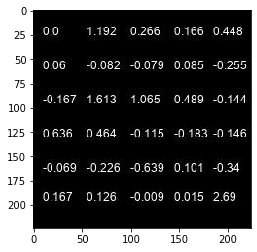

In [6]:
create_tml_image(data.iloc[1])

In [7]:
#adding random images
def shrink_dataset(new_size_negative):
    pos = []
    neg = []
    final_set = []
    for idx in data.index:
        if(data.iloc[idx]['Class']==1):
            pos.append(idx)
        else:
            neg.append(idx)
    random.shuffle(neg)
    for elem in neg[:new_size_negative]:
        final_set.append(elem)
    for elem in pos:
        final_set.append(elem)
    random.shuffle(final_set)
    return final_set
    
processed_data = shrink_dataset(6000)

In [8]:
#create all SuperTML images for given data located at 'path_to_data'
def create_tml_image_total(path_to_data):
    data = pd.read_csv(path_to_data)
    counter= 0
    font = ImageFont.truetype('Arial.ttf', size = 13)
    for idx in processed_data:
        counter+=1
        data_line = data.iloc[idx]
        tml_img = Image.new('RGB', (width, height), color = 'black')
        draw  = ImageDraw.Draw(tml_img)
        draw.text((100, 200), str(data_line['Time']), font=font, fill = (255, 255, 255))
        draw.text((40, 20), str(data_line['V1'])[:5], font=font, fill = (255, 255, 255))
        draw.text((85, 20), str(data_line['V2'])[:5], font=font, fill = (255, 255, 255))
        draw.text((130, 20), str(data_line['V3'])[:5], font=font, fill = (255, 255, 255))
        draw.text((175, 20), str(data_line['V4'])[:5], font=font, fill = (255, 255, 255))
        draw.text((10, 50), str(data_line['V5'])[:5], font=font, fill = (255, 255, 255))
        draw.text((55, 50), str(data_line['V6'])[:5], font=font, fill = (255, 255, 255))
        draw.text((100, 50), str(data_line['V7'])[:5], font=font, fill = (255, 255, 255))
        draw.text((145, 50), str(data_line['V8'])[:5], font=font, fill = (255, 255, 255))
        draw.text((185, 50), str(data_line['V9'])[:5], font=font, fill = (255, 255, 255))
        draw.text((10, 80), str(data_line['V10'])[:5], font=font, fill = (255, 255, 255))
        draw.text((55, 80), str(data_line['V11'])[:5], font=font, fill = (255, 255, 255))
        draw.text((100, 80), str(data_line['V12'])[:5], font=font, fill = (255, 255, 255))
        draw.text((145, 80), str(data_line['V13'])[:5], font=font, fill = (255, 255, 255))
        draw.text((185, 80), str(data_line['V14'])[:5], font=font, fill = (255, 255, 255))
        draw.text((10, 110), str(data_line['V15'])[:5], font=font, fill = (255, 255, 255))
        draw.text((55, 110), str(data_line['V16'])[:5], font=font, fill = (255, 255, 255))
        draw.text((100, 110), str(data_line['V17'])[:5], font=font, fill = (255, 255, 255))
        draw.text((145, 110), str(data_line['V18'])[:5], font=font, fill = (255, 255, 255))
        draw.text((185, 110), str(data_line['V19'])[:5], font=font, fill = (255, 255, 255))
        draw.text((10, 140), str(data_line['V20'])[:5], font=font, fill = (255, 255, 255))
        draw.text((55, 140), str(data_line['V21'])[:5], font=font, fill = (255, 255, 255))
        draw.text((100, 140), str(data_line['V22'])[:5], font=font, fill = (255, 255, 255))
        draw.text((145, 140), str(data_line['V23'])[:5], font=font, fill = (255, 255, 255))
        draw.text((185, 140), str(data_line['V24'])[:5], font=font, fill = (255, 255, 255))
        draw.text((10, 170), str(data_line['V25'])[:5], font=font, fill = (255, 255, 255))
        draw.text((55, 170), str(data_line['V26'])[:5], font=font, fill = (255, 255, 255))
        draw.text((100, 170), str(data_line['V27'])[:5], font=font, fill = (255, 255, 255))
        draw.text((145, 170), str(data_line['V28'])[:5], font=font, fill = (255, 255, 255))
        draw.text((185, 170), str(data_line['Amount'])[:5], font=font, fill = (255, 255, 255))
        img_name = str(int(data_line['Class'])) + '_' + str(idx) + '.jpg'
        print(img_name)
        tml_img.save(os.path.join('data', img_name))
        imgs.append(img_name)
    print(counter)

In [9]:
clear_images(imgs)
create_tml_image_total('creditcard.csv')

0_156110.jpg
0_156010.jpg
0_214426.jpg
0_70723.jpg
0_68028.jpg
0_283763.jpg
1_163586.jpg
0_104002.jpg
0_262944.jpg
0_10608.jpg
0_136825.jpg
0_39228.jpg
0_181857.jpg
0_104044.jpg
0_190392.jpg
0_63744.jpg
0_205679.jpg
0_115120.jpg
0_51054.jpg
0_10327.jpg
0_29371.jpg
0_32703.jpg
0_145168.jpg
0_136459.jpg
0_231891.jpg
0_114561.jpg
0_70634.jpg
0_80.jpg
0_130908.jpg
0_133948.jpg
0_51160.jpg
0_126732.jpg
0_284401.jpg
0_125555.jpg
0_75213.jpg
0_189025.jpg
0_31765.jpg
0_72615.jpg
0_269984.jpg
0_109176.jpg
0_224952.jpg
0_202020.jpg
0_205444.jpg
0_100377.jpg
0_236961.jpg
0_86765.jpg
0_191114.jpg
1_79536.jpg
0_129461.jpg
0_135805.jpg
0_151949.jpg
0_283686.jpg
0_34424.jpg
0_283381.jpg
0_191520.jpg
0_163113.jpg
0_153573.jpg
0_213537.jpg
0_224561.jpg
0_88457.jpg
0_218509.jpg
0_229139.jpg
0_121674.jpg
0_88050.jpg
0_195781.jpg
0_179755.jpg
0_89648.jpg
0_137570.jpg
1_12108.jpg
0_128280.jpg
1_9035.jpg
0_57330.jpg
0_7860.jpg
0_193426.jpg
0_61817.jpg
0_85756.jpg
1_223618.jpg
1_243393.jpg
0_112971.jpg
0_183

0_251492.jpg
0_251075.jpg
0_37425.jpg
0_14799.jpg
1_16780.jpg
0_59450.jpg
0_189657.jpg
0_63729.jpg
0_261212.jpg
0_111444.jpg
0_274187.jpg
0_230092.jpg
0_5553.jpg
0_63741.jpg
0_88536.jpg
0_225795.jpg
0_97166.jpg
0_17655.jpg
0_242425.jpg
0_277767.jpg
0_160869.jpg
0_36919.jpg
0_11757.jpg
0_20993.jpg
0_157528.jpg
0_240327.jpg
0_110949.jpg
0_11028.jpg
0_80074.jpg
0_96203.jpg
0_10003.jpg
0_17093.jpg
0_135429.jpg
0_48577.jpg
0_35407.jpg
0_17762.jpg
1_23308.jpg
0_279415.jpg
0_254596.jpg
0_216966.jpg
0_130787.jpg
0_36905.jpg
0_210752.jpg
0_248357.jpg
0_220035.jpg
0_211759.jpg
0_41806.jpg
0_238437.jpg
0_201229.jpg
0_259217.jpg
0_65469.jpg
0_127949.jpg
0_78084.jpg
0_184012.jpg
0_226546.jpg
0_248561.jpg
0_135812.jpg
0_151619.jpg
0_74241.jpg
0_232592.jpg
0_279546.jpg
0_128802.jpg
0_264615.jpg
0_24909.jpg
0_57495.jpg
0_222352.jpg
1_40525.jpg
0_167577.jpg
0_2553.jpg
0_190019.jpg
0_271276.jpg
0_278340.jpg
0_82432.jpg
0_158405.jpg
0_144065.jpg
0_125680.jpg
0_111772.jpg
0_122168.jpg
0_153630.jpg
0_20283

1_123238.jpg
0_281273.jpg
0_211957.jpg
0_246937.jpg
0_133380.jpg
0_264721.jpg
0_158692.jpg
0_118874.jpg
0_114385.jpg
0_88574.jpg
0_214027.jpg
0_267623.jpg
0_230276.jpg
0_110382.jpg
0_155718.jpg
0_234142.jpg
0_22368.jpg
0_130225.jpg
0_80694.jpg
0_34978.jpg
0_73421.jpg
0_207412.jpg
0_15131.jpg
0_145098.jpg
0_58837.jpg
0_106852.jpg
0_249675.jpg
0_47771.jpg
0_80949.jpg
0_99433.jpg
0_79437.jpg
0_166459.jpg
0_54887.jpg
0_97651.jpg
0_34942.jpg
0_79654.jpg
0_182828.jpg
0_197628.jpg
0_90986.jpg
0_272554.jpg
0_192872.jpg
0_2821.jpg
0_261860.jpg
0_92582.jpg
0_20751.jpg
0_47566.jpg
0_59842.jpg
0_236398.jpg
0_117619.jpg
0_61558.jpg
0_151653.jpg
0_112103.jpg
0_98920.jpg
0_37957.jpg
0_259152.jpg
0_270849.jpg
0_172851.jpg
0_138607.jpg
0_265253.jpg
0_130552.jpg
0_119347.jpg
0_72486.jpg
0_119349.jpg
0_84651.jpg
0_95127.jpg
0_146116.jpg
0_217087.jpg
0_245105.jpg
0_248633.jpg
0_273594.jpg
0_243480.jpg
0_213622.jpg
0_161362.jpg
0_155151.jpg
0_64994.jpg
0_2919.jpg
0_108887.jpg
1_8296.jpg
0_208026.jpg
0_8995

0_40834.jpg
0_77644.jpg
0_77993.jpg
0_206724.jpg
0_68059.jpg
0_186249.jpg
0_18569.jpg
0_208733.jpg
0_62730.jpg
0_275443.jpg
0_192950.jpg
0_56286.jpg
0_110909.jpg
0_121677.jpg
0_37727.jpg
0_229579.jpg
0_250100.jpg
0_131887.jpg
1_181966.jpg
0_149177.jpg
0_219477.jpg
0_68216.jpg
0_148501.jpg
0_183253.jpg
0_266622.jpg
1_69980.jpg
0_220851.jpg
0_272331.jpg
0_209157.jpg
0_234165.jpg
0_121319.jpg
0_20190.jpg
0_121250.jpg
1_120505.jpg
0_181360.jpg
0_81194.jpg
1_108258.jpg
0_104416.jpg
0_93073.jpg
1_9252.jpg
0_278792.jpg
0_192716.jpg
0_219007.jpg
0_167012.jpg
0_283853.jpg
0_276300.jpg
0_217970.jpg
0_22715.jpg
0_193876.jpg
0_55514.jpg
0_187122.jpg
0_15649.jpg
0_134819.jpg
0_22840.jpg
0_222951.jpg
0_267992.jpg
0_159650.jpg
0_93775.jpg
0_152777.jpg
0_256647.jpg
0_113834.jpg
0_217228.jpg
0_89910.jpg
0_216537.jpg
0_225864.jpg
0_133069.jpg
1_42590.jpg
0_27894.jpg
0_134679.jpg
0_76541.jpg
0_239381.jpg
0_195912.jpg
0_281031.jpg
0_85392.jpg
0_241125.jpg
0_171105.jpg
0_13277.jpg
0_62050.jpg
0_225687.jpg


0_133530.jpg
0_237950.jpg
0_66485.jpg
0_188268.jpg
0_133867.jpg
0_25679.jpg
0_87677.jpg
0_92092.jpg
0_196342.jpg
0_283263.jpg
0_64101.jpg
0_234853.jpg
0_54150.jpg
0_165423.jpg
0_260585.jpg
0_58834.jpg
0_123344.jpg
0_176164.jpg
0_45657.jpg
0_42398.jpg
0_120485.jpg
0_1207.jpg
0_118211.jpg
0_124947.jpg
0_109511.jpg
1_79874.jpg
0_129732.jpg
0_64032.jpg
0_91880.jpg
0_191500.jpg
0_196422.jpg
0_27149.jpg
0_102095.jpg
0_10692.jpg
0_224593.jpg
0_55344.jpg
0_224939.jpg
0_220420.jpg
0_204701.jpg
0_84617.jpg
0_72030.jpg
0_221290.jpg
0_189386.jpg
0_262786.jpg
1_94218.jpg
0_268832.jpg
0_218915.jpg
0_13089.jpg
0_133608.jpg
0_74333.jpg
0_82244.jpg
0_75493.jpg
0_222586.jpg
0_233091.jpg
0_214836.jpg
0_203950.jpg
0_82418.jpg
0_6126.jpg
0_222555.jpg
0_60679.jpg
0_53380.jpg
0_203557.jpg
0_186483.jpg
0_234107.jpg
0_86172.jpg
0_22207.jpg
0_106014.jpg
0_111802.jpg
0_149548.jpg
0_53148.jpg
0_258636.jpg
0_51953.jpg
0_263564.jpg
1_95597.jpg
0_145608.jpg
0_99275.jpg
1_80760.jpg
0_22571.jpg
0_243841.jpg
0_191152.j

0_123631.jpg
0_108517.jpg
0_244722.jpg
0_156986.jpg
0_207358.jpg
0_79209.jpg
0_206847.jpg
0_255810.jpg
0_274219.jpg
0_247150.jpg
0_155362.jpg
0_57551.jpg
0_84482.jpg
0_61865.jpg
0_46794.jpg
0_91556.jpg
1_248296.jpg
0_119276.jpg
0_106076.jpg
1_42784.jpg
0_48534.jpg
0_116974.jpg
0_164297.jpg
0_101881.jpg
0_76876.jpg
0_265016.jpg
0_112481.jpg
0_242275.jpg
0_181369.jpg
0_154701.jpg
0_7744.jpg
0_31876.jpg
0_218453.jpg
0_216929.jpg
0_129655.jpg
1_6899.jpg
0_232622.jpg
0_6764.jpg
0_122452.jpg
0_37400.jpg
1_88897.jpg
0_178495.jpg
0_56521.jpg
0_29442.jpg
0_125290.jpg
1_73784.jpg
0_243582.jpg
0_5379.jpg
0_134433.jpg
0_130991.jpg
0_235723.jpg
0_192711.jpg
0_52924.jpg
0_258021.jpg
0_189081.jpg
0_147490.jpg
0_15632.jpg
0_234637.jpg
0_138392.jpg
0_124331.jpg
0_254862.jpg
0_142865.jpg
0_132848.jpg
0_45616.jpg
0_76363.jpg
0_245578.jpg
0_100230.jpg
0_222024.jpg
0_68735.jpg
0_217417.jpg
0_94948.jpg
0_50136.jpg
0_90755.jpg
0_78276.jpg
0_262203.jpg
0_266658.jpg
0_7366.jpg
0_37100.jpg
0_129375.jpg
0_54395.

0_180488.jpg
0_187326.jpg
0_115427.jpg
0_161572.jpg
1_237107.jpg
0_251335.jpg
0_207453.jpg
0_254704.jpg
0_247061.jpg
1_46998.jpg
0_223142.jpg
0_54382.jpg
0_80005.jpg
1_29687.jpg
0_147726.jpg
0_265780.jpg
0_143666.jpg
0_282073.jpg
0_50404.jpg
0_233945.jpg
0_218696.jpg
0_6073.jpg
0_21428.jpg
0_266589.jpg
0_107688.jpg
0_280938.jpg
0_39365.jpg
0_96722.jpg
0_282531.jpg
0_154339.jpg
0_174582.jpg
0_174273.jpg
0_136250.jpg
0_248827.jpg
1_42887.jpg
0_98759.jpg
0_40035.jpg
0_127184.jpg
0_86911.jpg
0_6612.jpg
0_201708.jpg
0_57568.jpg
0_94397.jpg
0_216025.jpg
0_199605.jpg
0_220451.jpg
0_225680.jpg
0_222739.jpg
0_182201.jpg
0_25214.jpg
0_264030.jpg
0_224462.jpg
0_121122.jpg
0_45297.jpg
1_42958.jpg
0_238000.jpg
0_206501.jpg
0_198909.jpg
0_257257.jpg
0_215921.jpg
0_213792.jpg
0_25747.jpg
0_1753.jpg
0_33236.jpg
0_167528.jpg
0_247179.jpg
0_59033.jpg
0_84572.jpg
0_231077.jpg
0_69157.jpg
0_235348.jpg
0_29703.jpg
0_105928.jpg
0_77050.jpg
0_10679.jpg
0_181894.jpg
0_105245.jpg
0_164266.jpg
0_174788.jpg
0_16

0_141869.jpg
0_102990.jpg
0_130705.jpg
0_120468.jpg
0_269451.jpg
0_76921.jpg
0_282946.jpg
0_47911.jpg
0_52926.jpg
0_16388.jpg
0_34565.jpg
0_52491.jpg
0_2412.jpg
0_278095.jpg
0_59746.jpg
0_104580.jpg
0_135603.jpg
0_76158.jpg
0_227000.jpg
0_180410.jpg
0_217999.jpg
0_262365.jpg
0_180442.jpg
0_253154.jpg
0_130722.jpg
0_22886.jpg
0_266241.jpg
0_232646.jpg
0_119933.jpg
0_49783.jpg
0_173474.jpg
0_101682.jpg
0_130479.jpg
0_241799.jpg
0_13523.jpg
0_97594.jpg
0_61877.jpg
0_11503.jpg
0_64648.jpg
0_86651.jpg
0_119797.jpg
0_110030.jpg
0_97262.jpg
0_251037.jpg
0_274699.jpg
1_151730.jpg
0_250287.jpg
0_88793.jpg
0_283564.jpg
0_121417.jpg
0_264565.jpg
0_152671.jpg
0_128020.jpg
0_168848.jpg
0_260756.jpg
0_23431.jpg
0_72165.jpg
0_239564.jpg
0_129414.jpg
0_222746.jpg
0_186096.jpg
0_183369.jpg
0_272687.jpg
0_193042.jpg
0_188003.jpg
0_77852.jpg
0_243369.jpg
0_48721.jpg
0_269128.jpg
0_66950.jpg
0_193468.jpg
0_30841.jpg
0_87851.jpg
0_174432.jpg
0_115053.jpg
0_264967.jpg
0_210501.jpg
0_68503.jpg
0_105012.jpg
0

0_166412.jpg
1_70589.jpg
1_124176.jpg
1_141258.jpg
0_27858.jpg
0_186185.jpg
0_227577.jpg
0_272723.jpg
0_225896.jpg
0_2620.jpg
0_96511.jpg
0_116630.jpg
0_78399.jpg
0_156321.jpg
0_258843.jpg
0_37230.jpg
0_249106.jpg
1_58422.jpg
0_223827.jpg
0_24056.jpg
0_208828.jpg
0_46695.jpg
1_107637.jpg
0_201837.jpg
1_42936.jpg
0_50272.jpg
0_243139.jpg
0_86635.jpg
0_80777.jpg
0_109208.jpg
0_143160.jpg
0_235412.jpg
0_253587.jpg
0_267368.jpg
0_55131.jpg
0_217138.jpg
0_147756.jpg
0_174448.jpg
0_71654.jpg
0_280780.jpg
0_103837.jpg
0_153436.jpg
0_160499.jpg
1_43160.jpg
0_81927.jpg
0_244312.jpg
0_136169.jpg
0_117054.jpg
0_106343.jpg
0_246606.jpg
0_235705.jpg
0_21689.jpg
1_154684.jpg
0_239522.jpg
0_83099.jpg
0_12606.jpg
0_173275.jpg
0_64752.jpg
0_279494.jpg
0_199357.jpg
0_38355.jpg
0_136518.jpg
0_233199.jpg
0_140068.jpg
0_228412.jpg
0_186142.jpg
0_70338.jpg
0_129694.jpg
0_275046.jpg
0_43488.jpg
0_145502.jpg
0_250253.jpg
1_6641.jpg
0_10029.jpg
0_205131.jpg
0_2609.jpg
0_235024.jpg
0_185145.jpg
0_6007.jpg
1_119

0_4460.jpg
0_124382.jpg
0_177693.jpg
0_105226.jpg
0_61354.jpg
0_197927.jpg
0_279565.jpg
0_17617.jpg
0_170213.jpg
0_146438.jpg
0_88391.jpg
0_164753.jpg
0_171270.jpg
0_257942.jpg
1_15539.jpg
0_210638.jpg
0_103613.jpg
0_106414.jpg
0_199873.jpg
0_31596.jpg
1_30496.jpg
0_138439.jpg
0_202370.jpg
0_11573.jpg
0_109362.jpg
0_87060.jpg
0_139644.jpg
0_176198.jpg
0_106267.jpg
0_283509.jpg
0_128638.jpg
0_80836.jpg
0_86961.jpg
1_154960.jpg
0_34249.jpg
1_17407.jpg
0_21886.jpg
0_208935.jpg
0_55503.jpg
0_13837.jpg
0_115745.jpg
0_185498.jpg
0_172005.jpg
0_109399.jpg
0_179687.jpg
0_18707.jpg
0_266680.jpg
0_60616.jpg
0_60986.jpg
0_187179.jpg
0_21371.jpg
0_105201.jpg
0_129355.jpg
0_189901.jpg
0_203653.jpg
0_141558.jpg
0_113853.jpg
0_182371.jpg
0_282778.jpg
0_99692.jpg
0_284120.jpg
0_222193.jpg
0_278458.jpg
0_75322.jpg
0_29598.jpg
1_42696.jpg
0_274516.jpg
1_10630.jpg
0_18766.jpg
1_72757.jpg
0_42151.jpg
0_61419.jpg
0_15790.jpg
0_235835.jpg
0_65026.jpg
0_81282.jpg
0_95793.jpg
0_165538.jpg
0_207708.jpg
0_94435

In [10]:
train, test = train_test_split(imgs, test_size=0.2, random_state=1)
print(len(train))
print(len(test))

for image in train:
    if (not os.path.exists(os.path.join('data/train', image))):
        shutil.move(os.path.join('data', image), os.path.join('data', 'train'))
"""for image in val:
    if (not os.path.exists(os.path.join('data/val', image))):
        shutil.move(os.path.join('data', image), os.path.join('data', 'val'))"""
for image in test:
    if (not os.path.exists(os.path.join('data/test', image))):
        shutil.move(os.path.join('data', image), os.path.join('data', 'test'))

5193
1299


In [11]:
def get_label(num):
    if (num==0):
        return 'Fraudulent'
    else:
        return 'Not Fraudulent'

In [12]:
#creating images and label pairs
def create_labels(train, test):
    test_labels = []
    train_labels = []
    test_examples = []
    train_examples = []
    for image in train:
        label = int(image.split('_')[0])
        train_labels.append(label)
        train_examples.append(mpimg.imread('data/train/' + image))
    for image in test:
        label = int(image.split('_')[0])
        test_labels.append(label)
        test_examples.append(mpimg.imread('data/test/' + image))
    return test_labels, train_labels, test_examples, train_examples
test_labels, train_labels, test_examples, train_examples = create_labels(train, test)

<TensorSliceDataset shapes: ((224, 224, 3), ()), types: (tf.int32, tf.int32)>
<TensorSliceDataset shapes: ((224, 224, 3), ()), types: (tf.int32, tf.int32)>


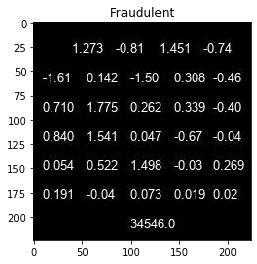

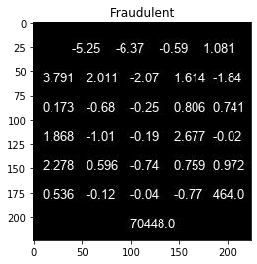

In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))
#val_dataset = tf.data.Dataset.from_tensor_slices((val_examples, val_labels))
print(train_dataset)
print(test_dataset)
#print(val_dataset)

for image, label in train_dataset.take(2):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label(label))

In [14]:
train = train_dataset
#validation = val_dataset.map(format_example)
test = test_dataset

tf.Tensor(0, shape=(), dtype=int32)


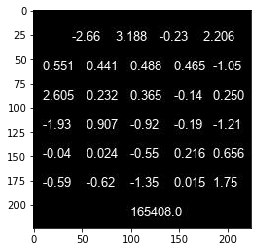

In [15]:
BATCH_SIZE = 30
SHUFFLE_BUFFER_SIZE = 9000
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE)
train_batches = train_batches.batch(BATCH_SIZE)
#validation_batches = validation.shuffle(SHUFFLE_BUFFER_SIZE)
#validation_batches = validation_batches.batch(BATCH_SIZE)
test_batches = test.shuffle(SHUFFLE_BUFFER_SIZE)
test_batches = test_batches.batch(BATCH_SIZE)
for image_batch, label_batch in train_batches.take(1):
    pass
image_batch.shape
image_test = plt.imshow(image_batch[0])
print(label_batch[0])

In [16]:
IMG_SHAPE = (224, 224, 3)
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE, include_top=False,weights='imagenet')

In [17]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(30, 7, 7, 2048)


In [18]:
#BEGIN
base_model.trainable = False
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [19]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(30, 2048)


In [21]:
dense_layer = tf.keras.layers.Dense(64, input_shape=(20, 1280))
dense = dense_layer(feature_batch_average)
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(dense)#prediction_batch = prediction_layer(dense)
print(prediction_batch.shape)

(30, 1)


In [22]:
model = tf.keras.Sequential([base_model, global_average_layer, dense_layer, prediction_layer])

In [23]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                131136    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 23,718,913
Trainable params: 131,201
Non-trainable params: 23,587,712
_________________________________________________________________


In [26]:
initial_epochs = 10
history = model.fit(train_batches,
                    epochs=initial_epochs)

Epoch 1/10
174/174 [==============================] - 286s 2s/step - loss: 0.2547 - accuracy: 0.9189
Epoch 2/10
174/174 [==============================] - 282s 2s/step - loss: 0.1914 - accuracy: 0.9299
Epoch 3/10
174/174 [==============================] - 275s 2s/step - loss: 0.1640 - accuracy: 0.9426
Epoch 4/10
174/174 [==============================] - 274s 2s/step - loss: 0.1515 - accuracy: 0.9494
Epoch 5/10
174/174 [==============================] - 301s 2s/step - loss: 0.1447 - accuracy: 0.9522
Epoch 6/10
174/174 [==============================] - 296s 2s/step - loss: 0.1397 - accuracy: 0.9546
Epoch 7/10
174/174 [==============================] - 276s 2s/step - loss: 0.1371 - accuracy: 0.9547
Epoch 8/10
174/174 [==============================] - 292s 2s/step - loss: 0.1337 - accuracy: 0.9588
Epoch 9/10
174/174 [==============================] - 287s 2s/step - loss: 0.1300 - accuracy: 0.9611
Epoch 10/10
174/174 [==============================] - 276s 2s/step - loss: 0.1288 - accura

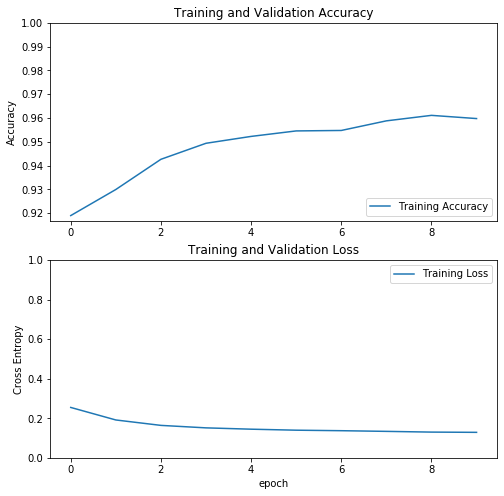

In [27]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

loss = history.history['loss']
#val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
#plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
#plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [28]:
base_model.trainable = True
print("Number of layers in the base model: ", len(base_model.layers))
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  175


In [29]:
model.compile(loss=tf.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                131136    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 23,718,913
Trainable params: 19,584,129
Non-trainable params: 4,134,784
_________________________________________________________________


In [30]:
len(model.trainable_variables)

94

In [31]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_batches,
                         epochs=total_epochs,
                         initial_epoch =  history.epoch[-1])

Epoch 10/20
174/174 [==============================] - 573s 3s/step - loss: 0.3049 - accuracy: 0.9603
Epoch 11/20
174/174 [==============================] - 546s 3s/step - loss: 0.0217 - accuracy: 0.9933
Epoch 12/20
174/174 [==============================] - 532s 3s/step - loss: 0.0042 - accuracy: 0.9990
Epoch 13/20
174/174 [==============================] - 523s 3s/step - loss: 0.0015 - accuracy: 0.9996
Epoch 14/20
174/174 [==============================] - 518s 3s/step - loss: 2.7564e-04 - accuracy: 1.0000
Epoch 15/20
174/174 [==============================] - 517s 3s/step - loss: 8.1841e-05 - accuracy: 1.0000
Epoch 16/20
174/174 [==============================] - 528s 3s/step - loss: 1.0195e-04 - accuracy: 1.0000
Epoch 17/20
174/174 [==============================] - 569s 3s/step - loss: 1.4088e-05 - accuracy: 1.0000
Epoch 18/20
174/174 [==============================] - 588s 3s/step - loss: 1.0987e-04 - accuracy: 1.0000
Epoch 19/20
174/174 [==============================] - 592s 3s

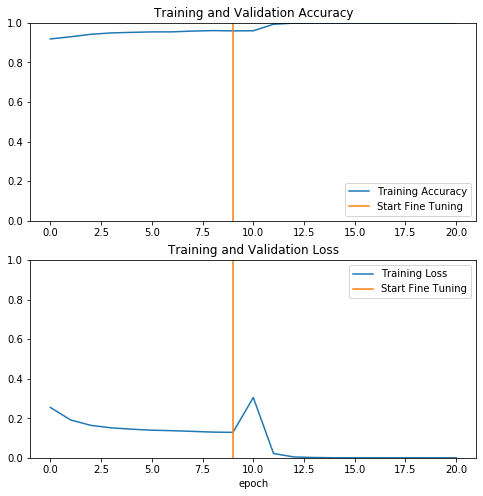

In [32]:
acc += history_fine.history['accuracy']

loss += history_fine.history['loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [33]:
print("Evaluate on test data")
results = model.evaluate(test_batches)
print("test loss, test acc:", results)

Evaluate on test data
44/44 [==============================] - 71s 2s/step - loss: 0.3142 - accuracy: 0.9808
test loss, test acc: [0.3142223656177521, 0.9807544350624084]


TEST ACCURACY: 98.1%